In [ ]:
import os, shutil


In [3]:
from fastai.vision import *
from fastai.metrics import error_rate, accuracy
import warnings
warnings.filterwarnings('ignore')
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
path = Path('/content/drive/My Drive/Colab Notebooks/chest_xray')

In [5]:
path.ls()

[PosixPath('/content/drive/My Drive/Colab Notebooks/chest_xray/train'),
 PosixPath('/content/drive/My Drive/Colab Notebooks/chest_xray/chest_xray'),
 PosixPath('/content/drive/My Drive/Colab Notebooks/chest_xray/val'),
 PosixPath('/content/drive/My Drive/Colab Notebooks/chest_xray/test')]

In [6]:
data_1 = ImageDataBunch.from_folder(path, train='train', valid='test', ds_tfms=get_transforms(do_flip=False), size=224, bs=64, num_workers=8)

['NORMAL', 'PNEUMONIA'] 2
5216 624


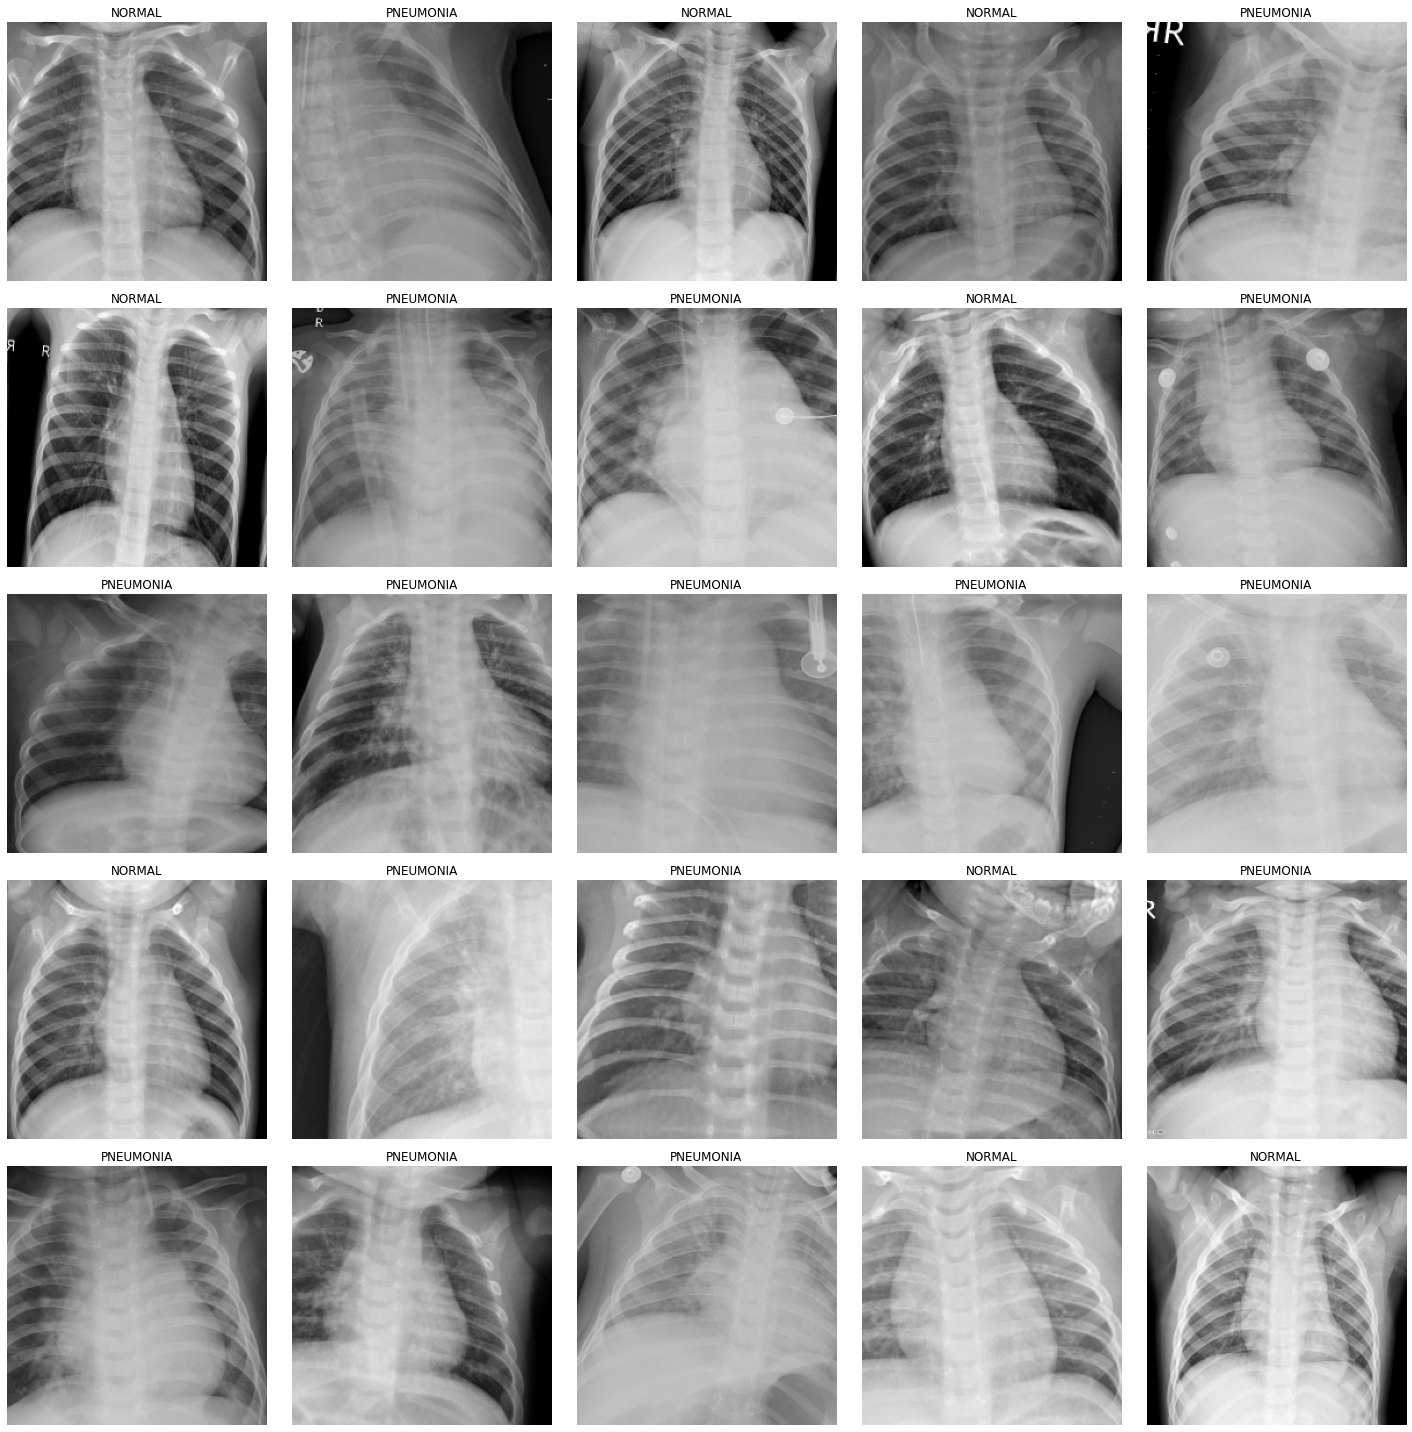

In [7]:
# Show what the data looks like after its transformation
data_1.show_batch()

# See the classes and the amount of classes in the dataset
print(data_1.classes,data_1.c)

# See the number of images in each individual dataset
print(len(data_1.train_ds), len(data_1.valid_ds))

In [8]:
# Using pretrained resnet34
# Error rate = 1 - accuracy 
learn_1 = cnn_learner(data_1, models.resnet34, metrics = [accuracy])

In [9]:
# Train the model on 4 epochs of data at the default learning rate 
learn_1.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.475006,0.480939,0.860577,03:44
1,0.269204,0.357893,0.879808,03:41
2,0.190507,0.306956,0.897436,03:43
3,0.150313,0.300130,0.902244,03:54


In [11]:
# Save model
learn_1.save('stage-1')


In [12]:
# Load the model
learn_1.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (5216 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
NORMAL,NORMAL,NORMAL,NORMAL,NORMAL
Path: /content/drive/My Drive/Colab Notebooks/chest_xray;

Valid: LabelList (624 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
PNEUMONIA,PNEUMONIA,PNEUMONIA,PNEUMONIA,PNEUMONIA
Path: /content/drive/My Drive/Colab Notebooks/chest_xray;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), pad

In [15]:
# Unfreeze all layers of the CNN
learn_1.unfreeze()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 6.31E-07
Min loss divided by 10: 3.31E-05


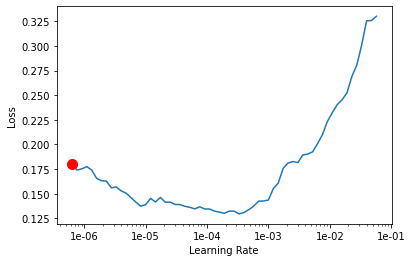

In [17]:
# Find the optimal learning rate and plot a visual 
learn_1.lr_find()
learn_1.recorder.plot(suggestion=True)

In [20]:
# Fit model with new learning rate over 4 epochs
learn_1.fit_one_cycle(2, max_lr=slice(3e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.060505,0.412741,0.884615,04:08
1,0.048889,0.207174,0.935897,04:09


In [21]:
learn_1.save('stage-1')

In [23]:
learn_1.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (5216 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
NORMAL,NORMAL,NORMAL,NORMAL,NORMAL
Path: /content/drive/My Drive/Colab Notebooks/chest_xray;

Valid: LabelList (624 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
PNEUMONIA,PNEUMONIA,PNEUMONIA,PNEUMONIA,PNEUMONIA
Path: /content/drive/My Drive/Colab Notebooks/chest_xray;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), pad

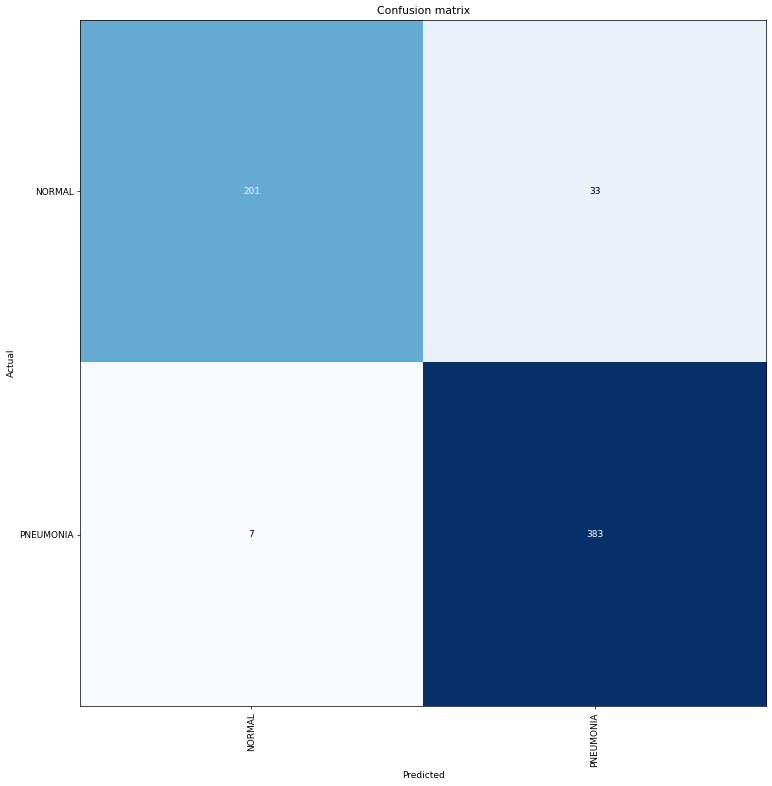

In [24]:
conf_mat_int = ClassificationInterpretation.from_learner(learn_1)

conf_mat_int.plot_confusion_matrix(figsize=(12,12), dpi=65)